# House Prices EDA (Exploratory Data Analysis)

### Import all libraries

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

### Read the .csv file to create the Pandas DataFrame (df) and check its key attributes

In [2]:
df = pd.read_csv ('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print('Shape:', df.shape, f'| Rows: {df.shape[0]}, Columns: {df.shape[1]}')

Shape: (1460, 81) | Rows: 1460, Columns: 81


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Check missing values within the df

In [5]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### Drop columns with more than 10% of missing values

In [6]:
df = df.drop(["Alley", "LotFrontage", "FireplaceQu", "PoolQC", "Fence", "MiscFeature", "MiscVal"], axis=1)
df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,30,0,320,0,0,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,57,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,204,228,0,0,0,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,205,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,4,0,0,0,0,1,2008,WD,Normal,118000


In [7]:
print('Shape:', df.shape, f'| Rows: {df.shape[0]}, Columns: {df.shape[1]}')

Shape: (1460, 74) | Rows: 1460, Columns: 74


## EDA

### For this analysis we will focus on a targeted or main variable: Sale Price. 
#### Plot the sale price histogram:

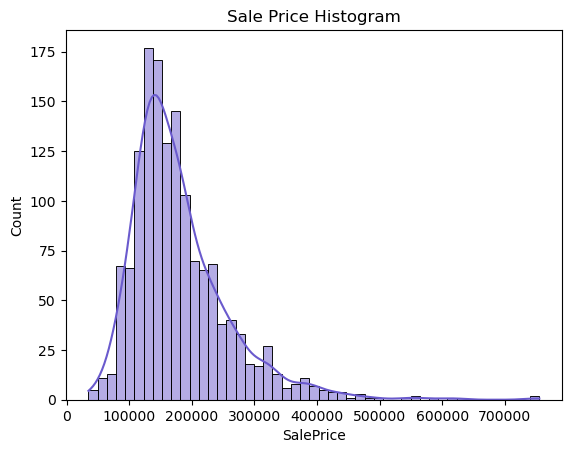

In [8]:
sns.histplot(df['SalePrice'], kde=True, color='slateblue')
plt.title('Sale Price Histogram')
plt.show()

In [9]:
print("Skewness: ", df['SalePrice'].skew())
print("Kurtosis: ", df['SalePrice'].kurt())

Skewness:  1.8828757597682129
Kurtosis:  6.536281860064529


#### The distribution of the SalePrice variable is Right-skewed with a 1.88 skewness, and a kurtosis of 6.54.

### Plot the sale price vs the year when it was sold

Text(0.5, 1.0, 'House Price vs Year Sold')

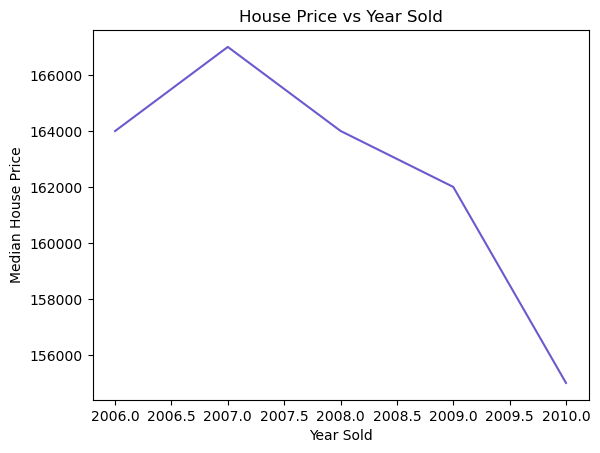

In [10]:
df.groupby('YrSold')['SalePrice'].median().plot(color='slateblue')
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('House Price vs Year Sold')

#### The median house price has decreased. Between 2006 and 2007, the price showed an increasing pattern, with the highest value in 2007. However, from that period onwards, the price has been continuously decreasing, reaching its lowest point in 2010 

### Check the correlation between the numerical variables and Sale Price

#### Create 2 variables, the numerical and the categorical variables

In [11]:
numerical= df.select_dtypes(exclude='object').columns
categorical=df.select_dtypes(include='object').columns

#### Create a heat map with the 10 highly correlated variables with Sale Price

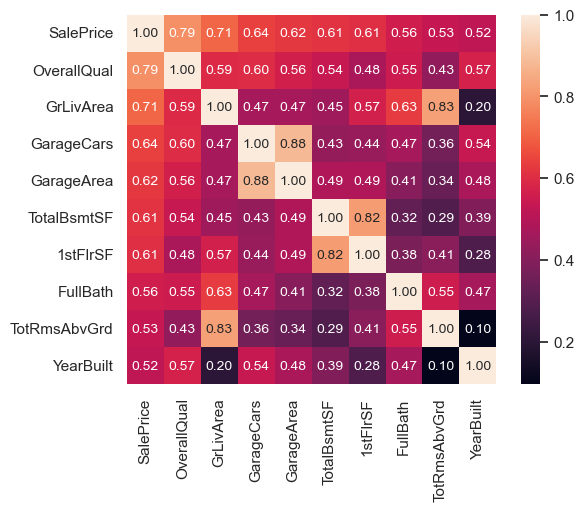

In [29]:
corrnum = df[numerical].corr().nlargest(10,"SalePrice")['SalePrice'].index
coef=np.corrcoef(df[corrnum].values.T)
hm = sns.heatmap(coef, cbar=True, annot=True, square=True, fmt='.2f',
                annot_kws={'size':10}, yticklabels=corrnum.values, xticklabels=corrnum.values)
plt.show()

#### We can get 5 important variables to analize from this heatmap: Overall Quality, Living Area ft2, Garage Space (Car #), Basement Area ft2,  Built Year

#### Create a pairplot for the previous variables:

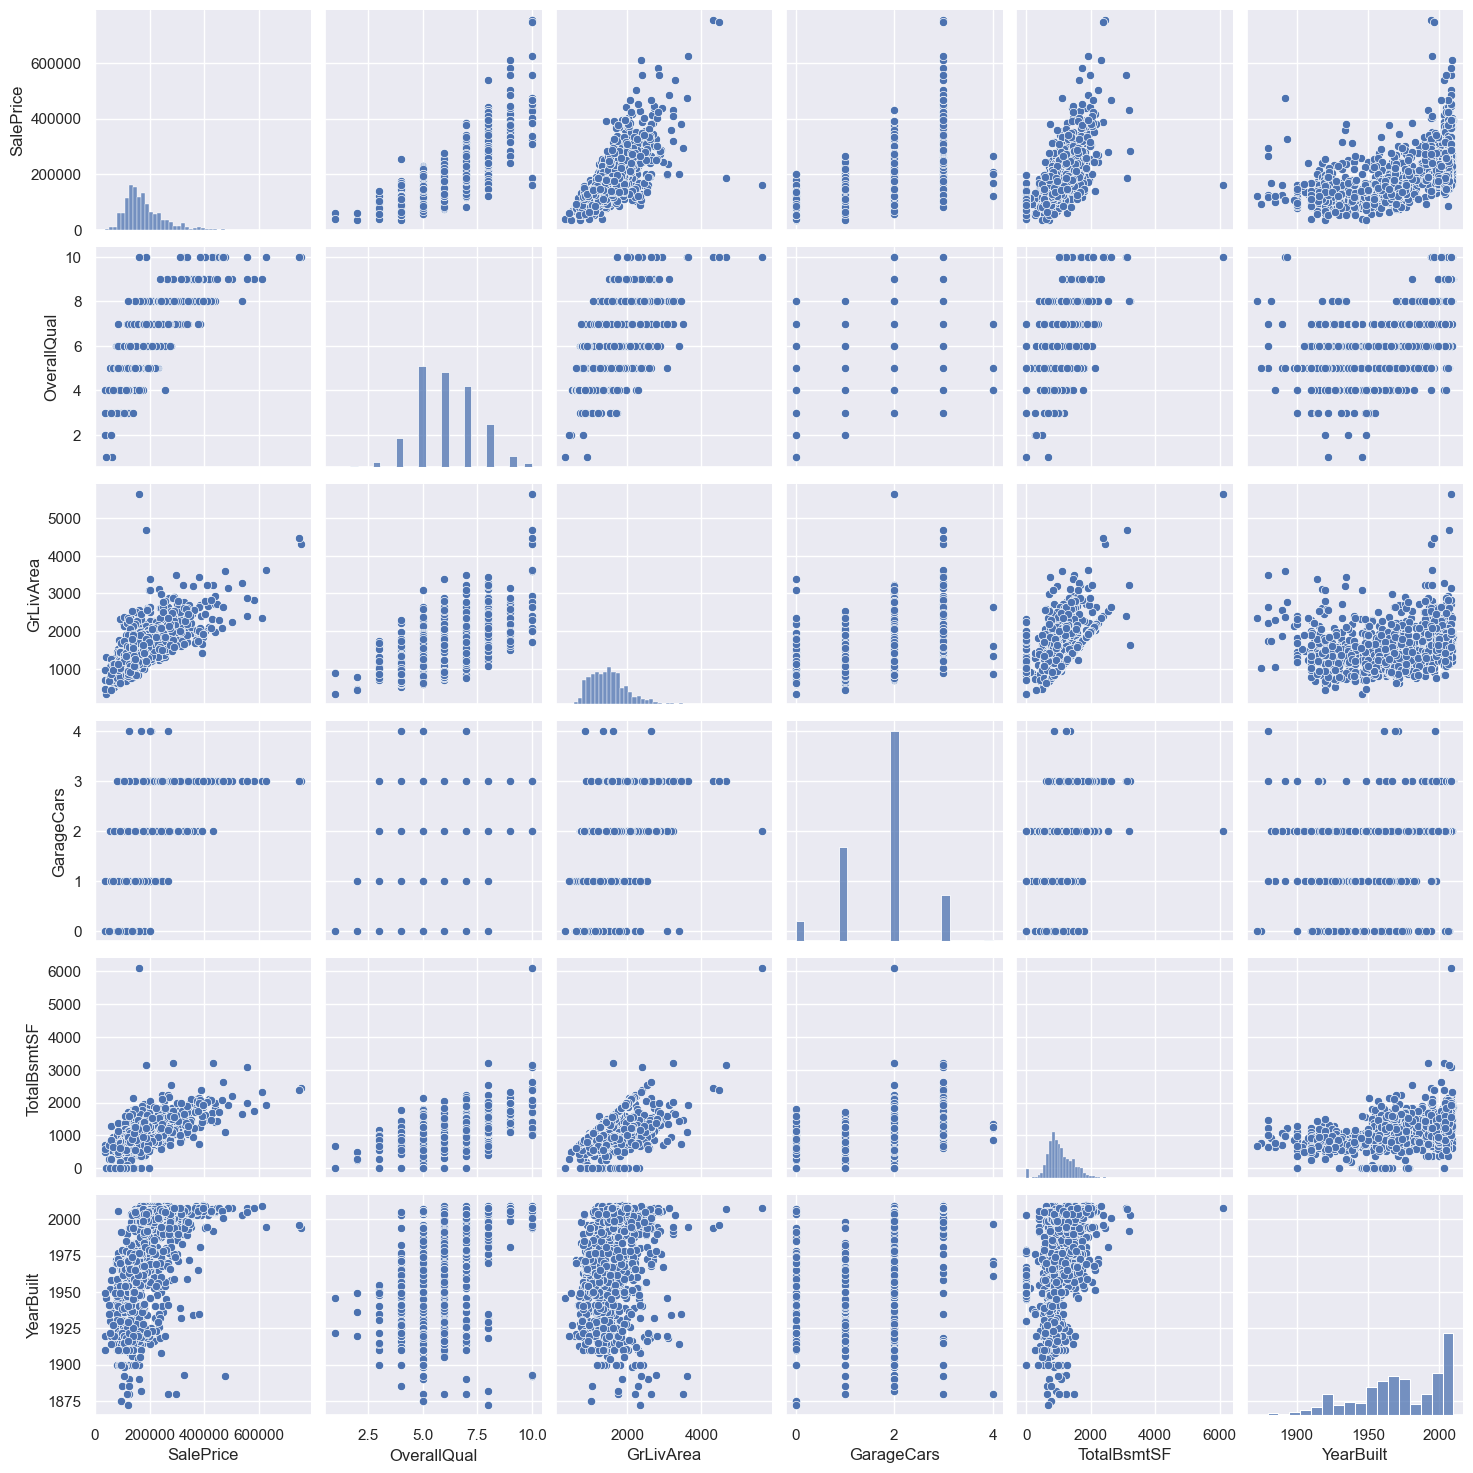

In [31]:
sns.set()
scatt= ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']
sns.pairplot(df[scatt])
plt.show()

### Overall Quality VS Sale Price

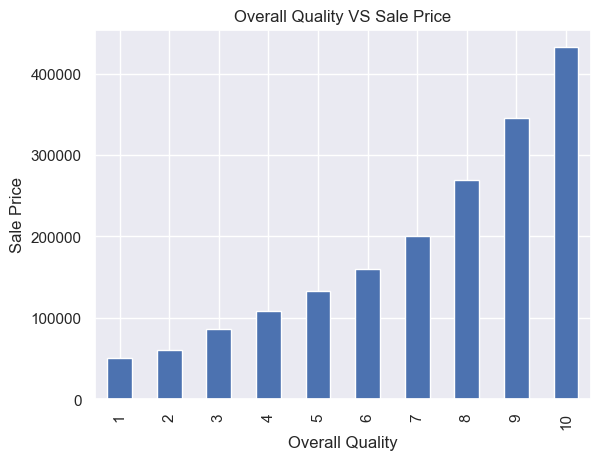

In [14]:
df.groupby('OverallQual')['SalePrice'].median().plot.bar()
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.title('Overall Quality VS Sale Price')
plt.show()

In [22]:
np.corrcoef(df['OverallQual'],df['SalePrice'])

array([[1.       , 0.7909816],
       [0.7909816, 1.       ]])

#### We can determine that the Sale Price is highly correlated with the Overall Quality, having a correlation coefficient of 0.79. A better quality of materials and finishes in the house will result in a higher price.

### Living Area VS Sale Price

Text(0.5, 1.0, 'Living Area VS Sale Price')

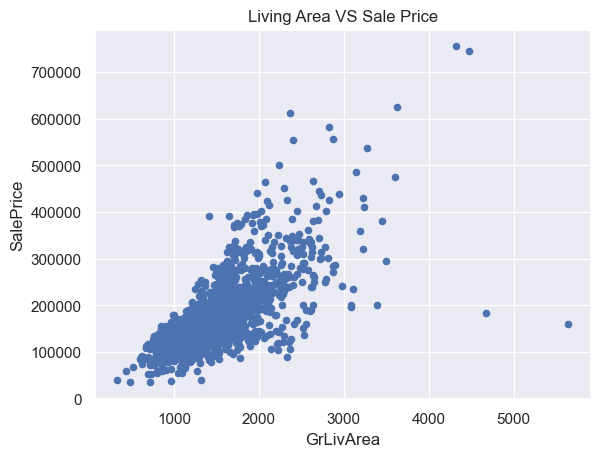

In [32]:
bsmt = pd.concat([df['SalePrice'], df['GrLivArea']], axis=1)
bsmt.plot.scatter(x='GrLivArea', y='SalePrice')
plt.title('Living Area VS Sale Price')

In [24]:
np.corrcoef(df['GrLivArea'],df['SalePrice'])

array([[1.        , 0.70862448],
       [0.70862448, 1.        ]])

#### We can determine there is a positive correlation between the Living Area (ft2) and the Sale Price, with a correlation coefficient of 0.71. Bigger area means a higuer price

### Garage Cars Space VS Sale Price

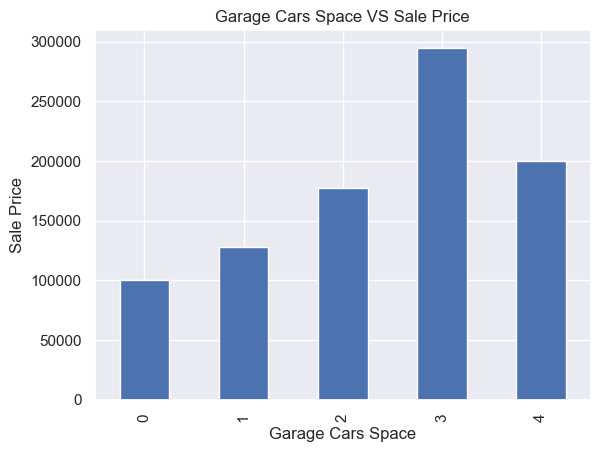

In [16]:
df.groupby('GarageCars')['SalePrice'].median().plot.bar()
plt.xlabel('Garage Cars Space')
plt.ylabel('Sale Price')
plt.title('Garage Cars Space VS Sale Price')
plt.show()

In [25]:
np.corrcoef(df['GarageCars'],df['SalePrice'])

array([[1.       , 0.6404092],
       [0.6404092, 1.       ]])

#### There is a correlation between the number of garage car spaces and the Sale Price, with a correlation coefficient of 0.64. The Sale Price increases with the number of cars in the garage, with the highest Sale Price associated with houses having 3 car spaces. After that, the price decreases for houses with 4 car spaces.

### Year Built VS Sale Price

Text(0.5, 1.0, 'Year Built VS Sale Price')

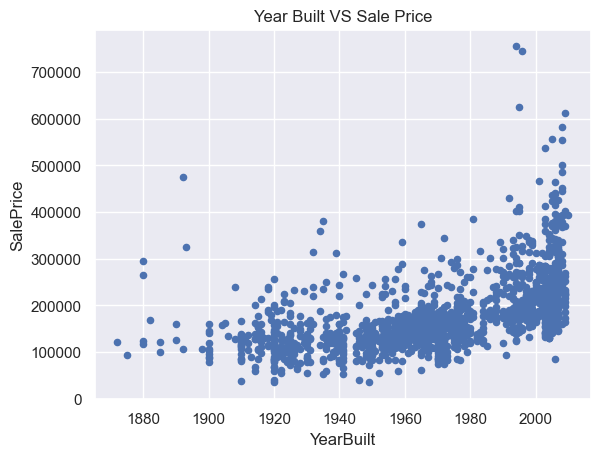

In [33]:
bsmt = pd.concat([df['SalePrice'], df['YearBuilt']], axis=1)
bsmt.plot.scatter(x='YearBuilt', y='SalePrice')
plt.title('Year Built VS Sale Price')

In [26]:
np.corrcoef(df['YearBuilt'],df['SalePrice'])

array([[1.        , 0.52289733],
       [0.52289733, 1.        ]])

#### There is a slight positive correlation between the year when the house was built and the Sale Price, with a correlation coefficient of 0.52. The Sale Price shows a slight increase in more recently built houses.

### Basement Area VS Sale Price

Text(0.5, 1.0, 'Basement Area VS Sale Price')

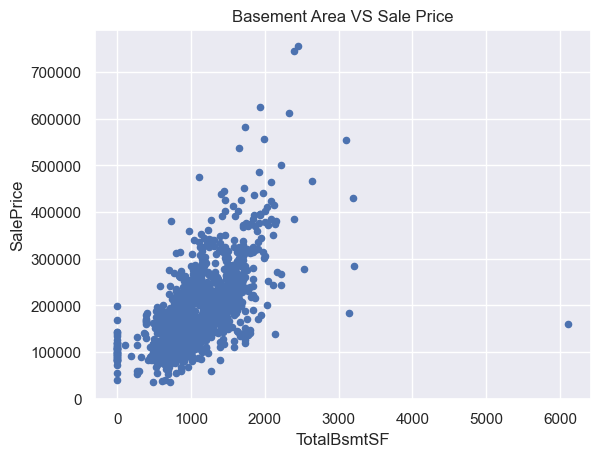

In [34]:
bsmt = pd.concat([df['SalePrice'], df['TotalBsmtSF']], axis=1)
bsmt.plot.scatter(x='TotalBsmtSF', y='SalePrice')
plt.title('Basement Area VS Sale Price')

In [27]:
np.corrcoef(df['TotalBsmtSF'],df['SalePrice'])

array([[1.        , 0.61358055],
       [0.61358055, 1.        ]])

#### There is a positive correlation between the Basement Area (ft2) and the Sale Price, with a correlation coefficient of 0.61. The Sale Price is higher for houses with a larger basement.

### Check the relation between the categorical variables and Sale Price

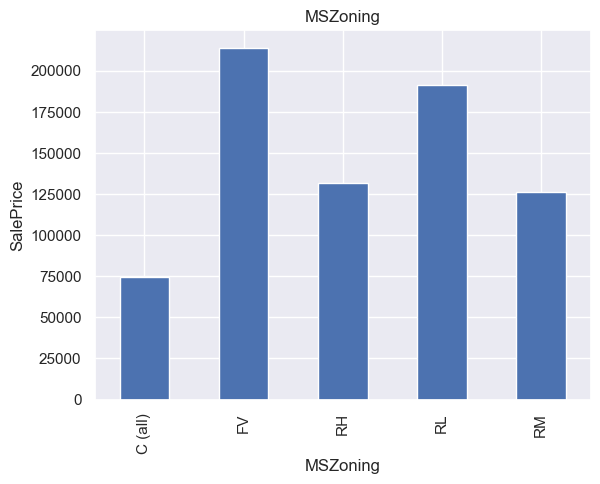

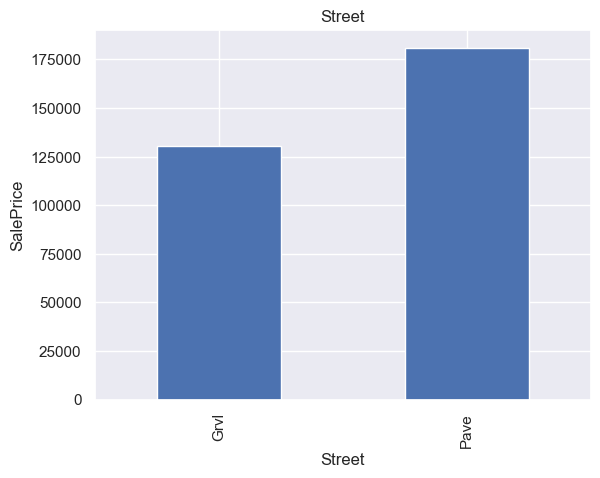

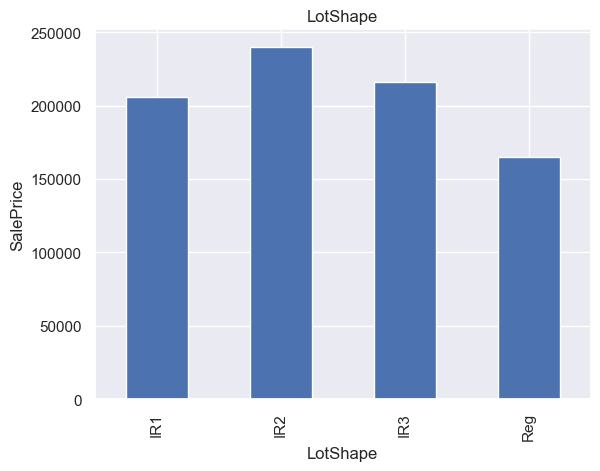

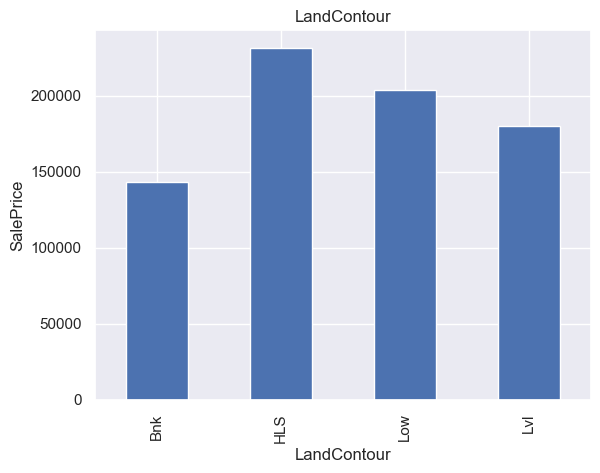

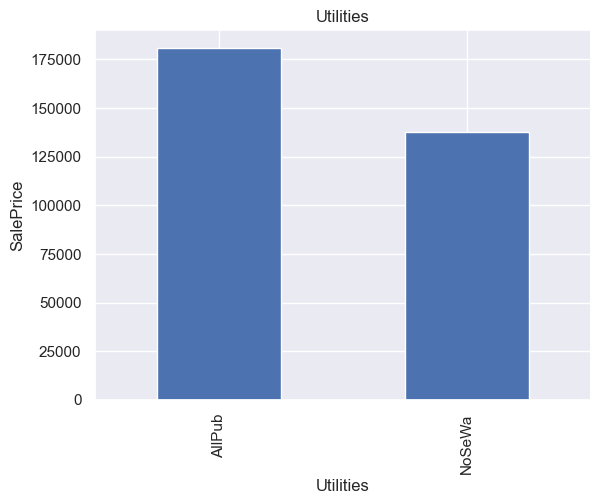

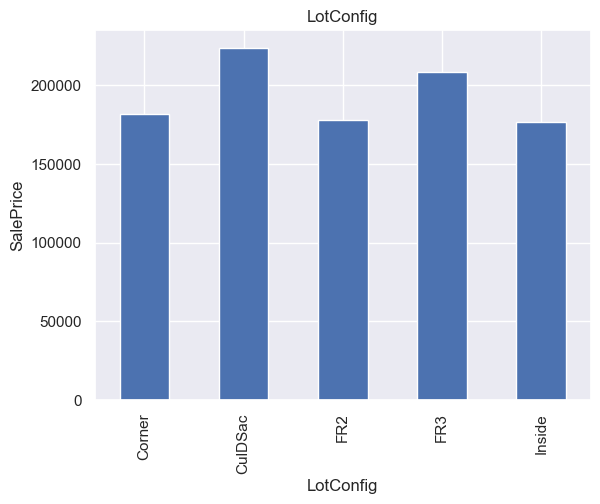

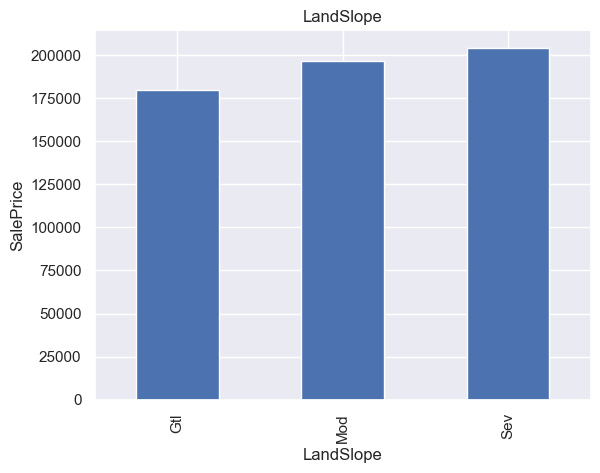

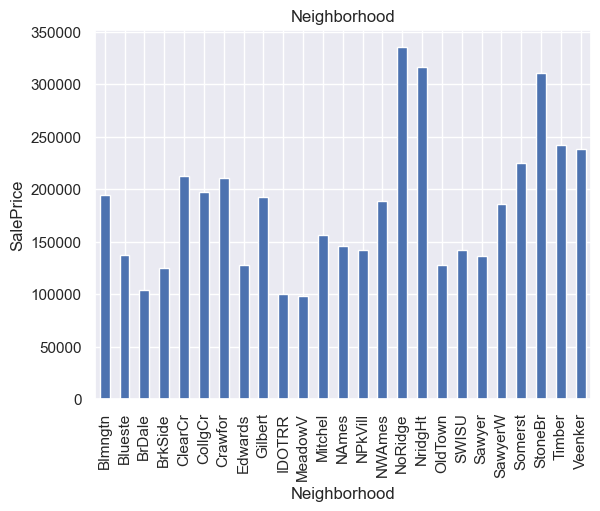

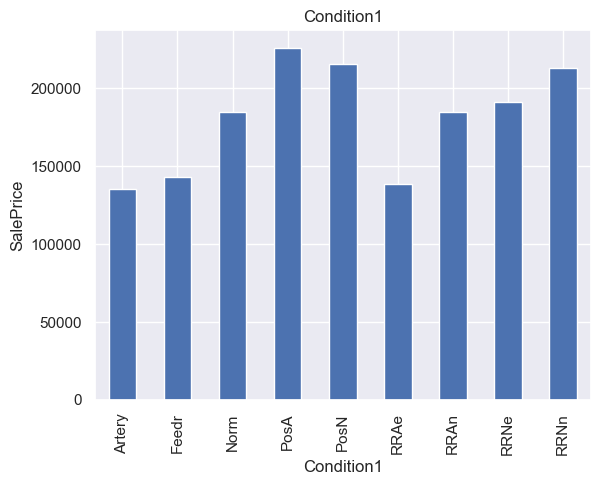

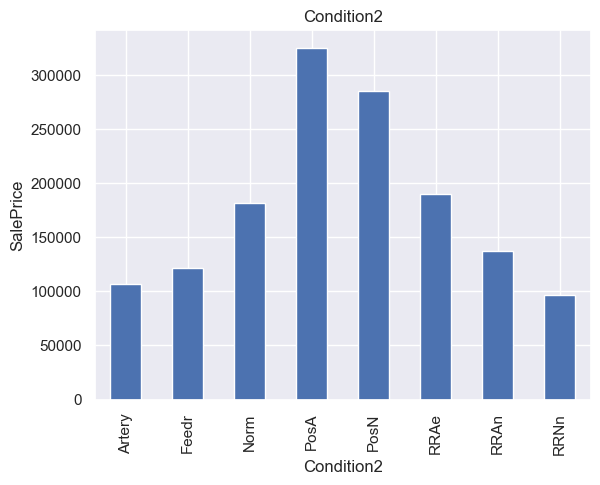

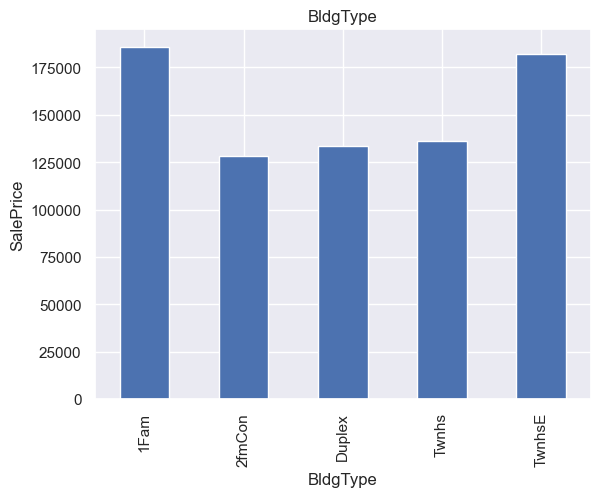

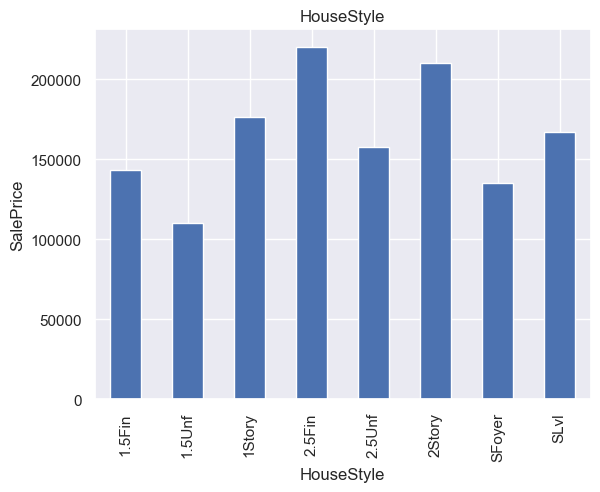

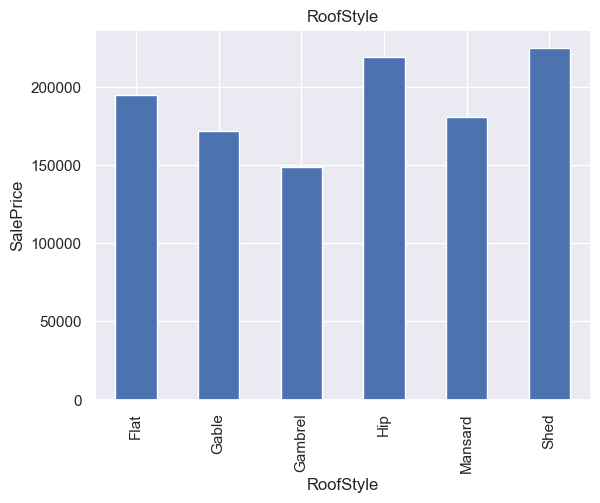

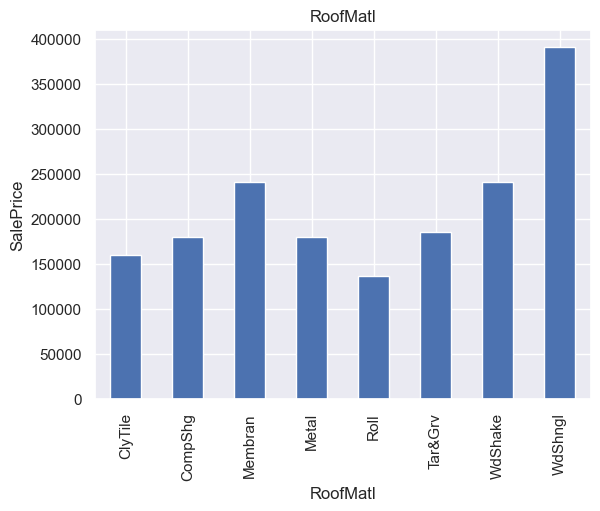

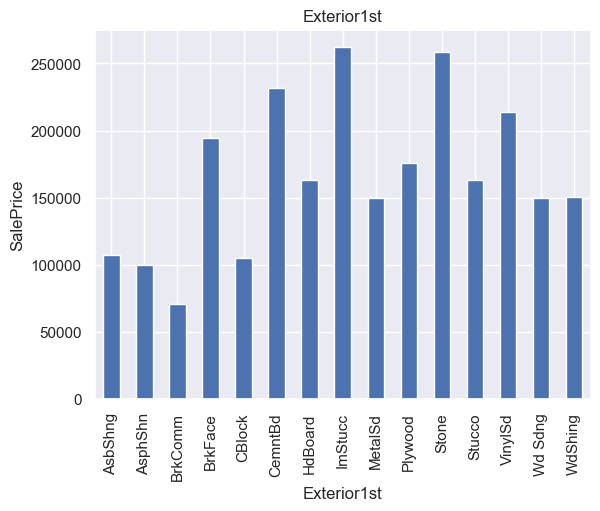

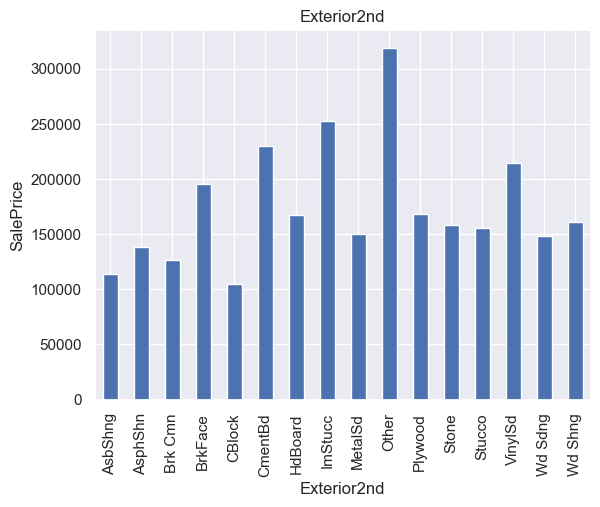

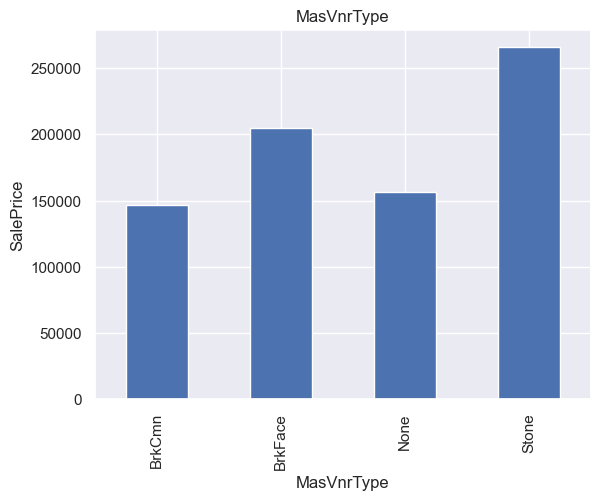

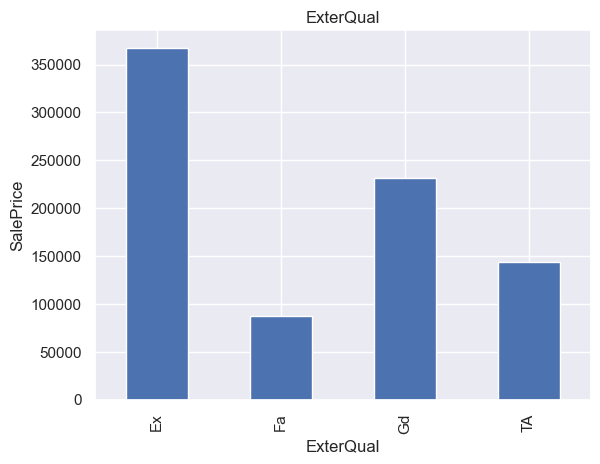

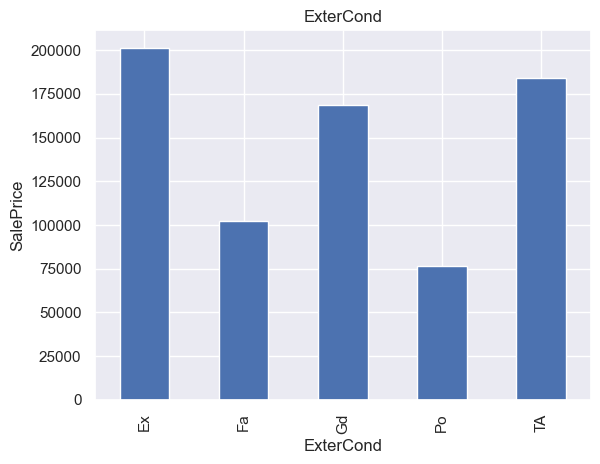

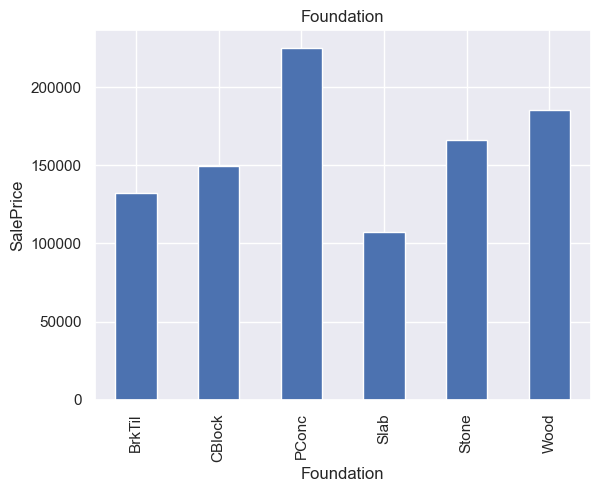

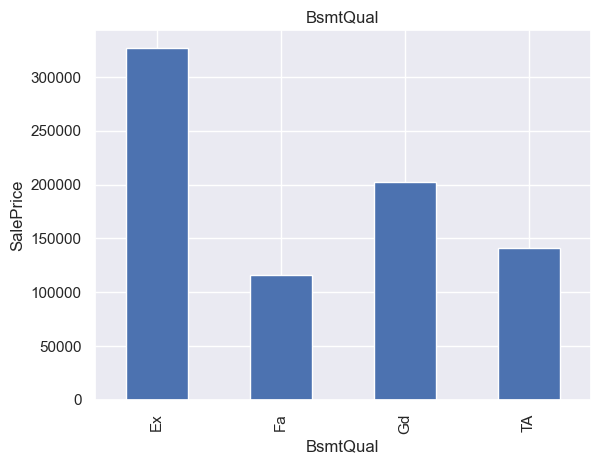

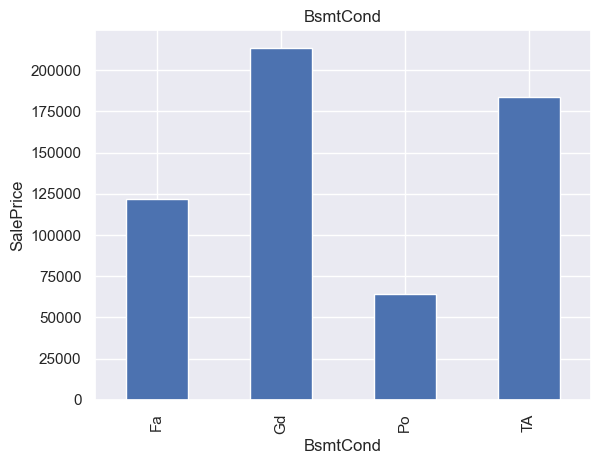

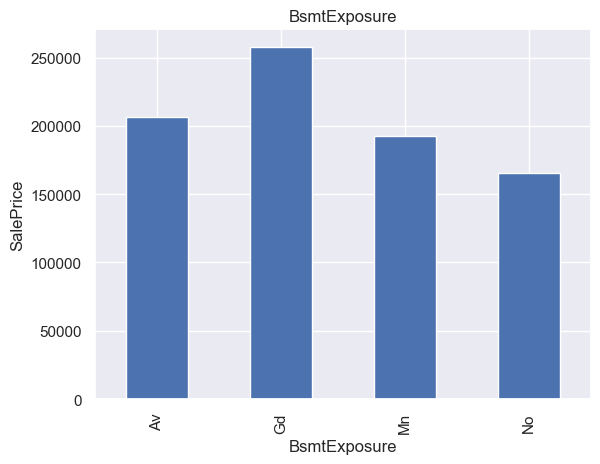

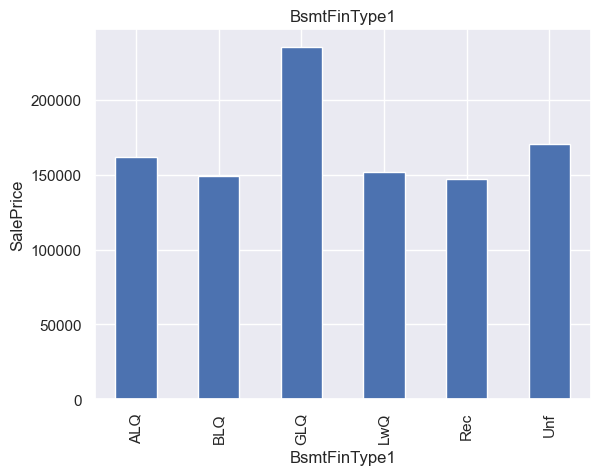

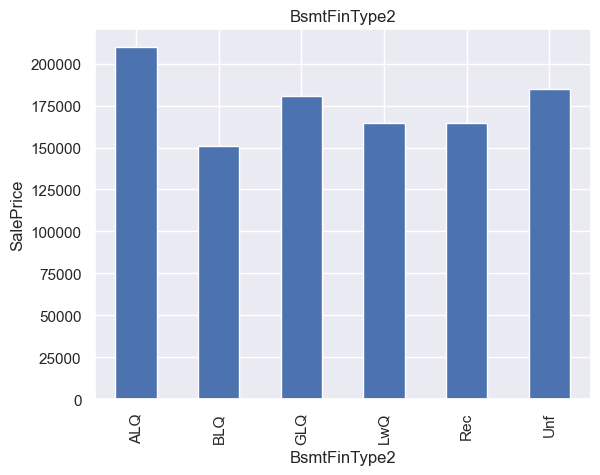

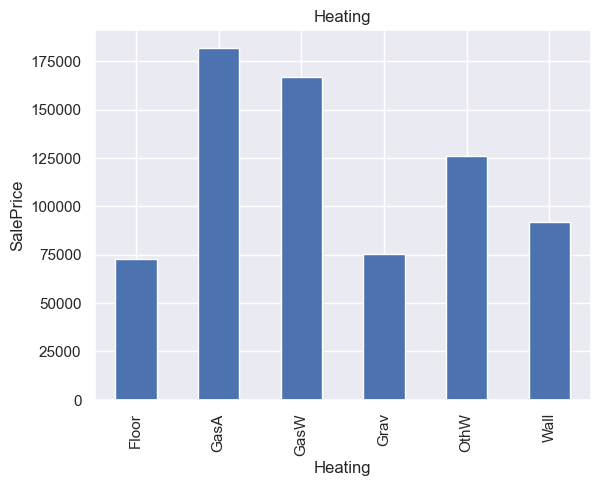

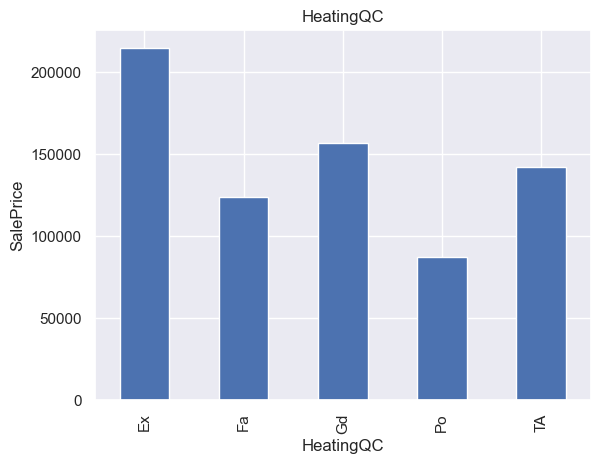

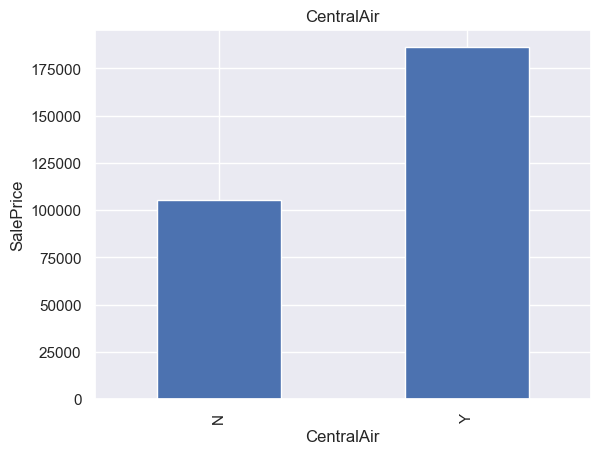

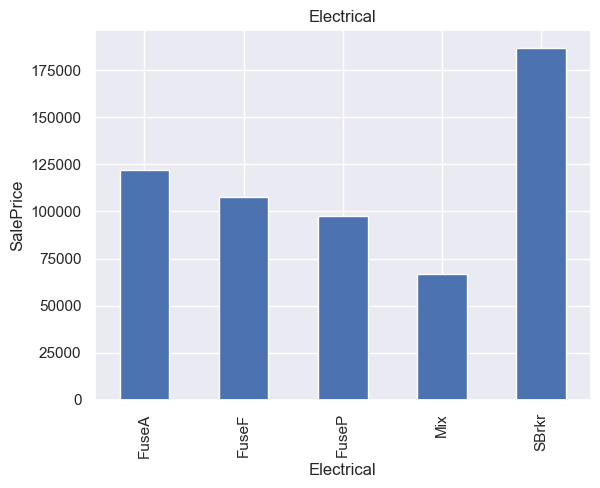

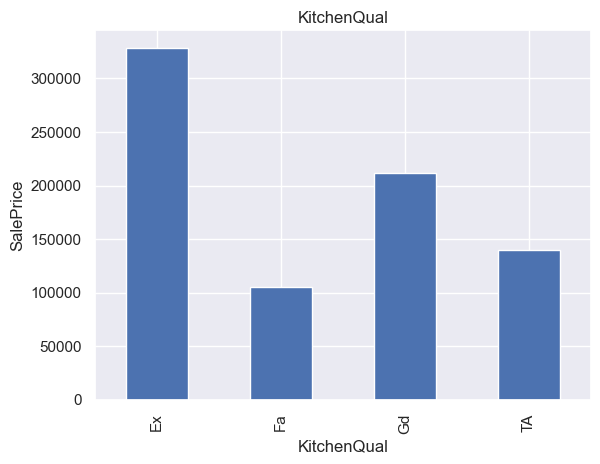

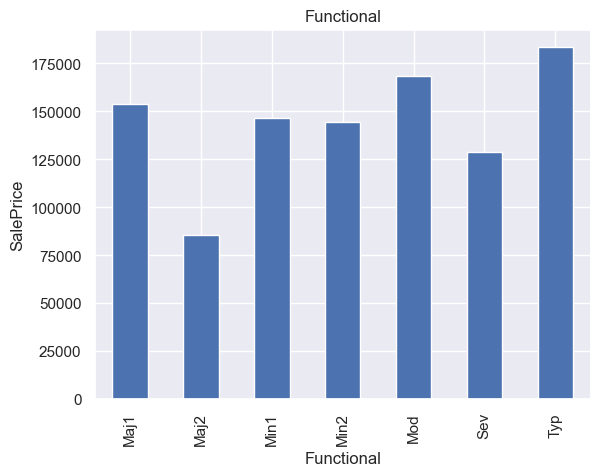

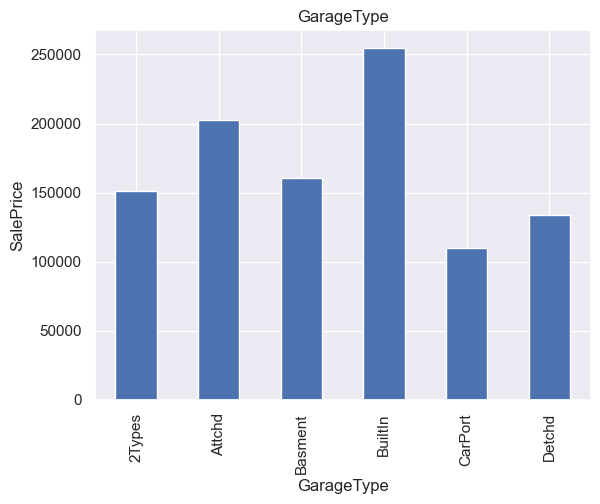

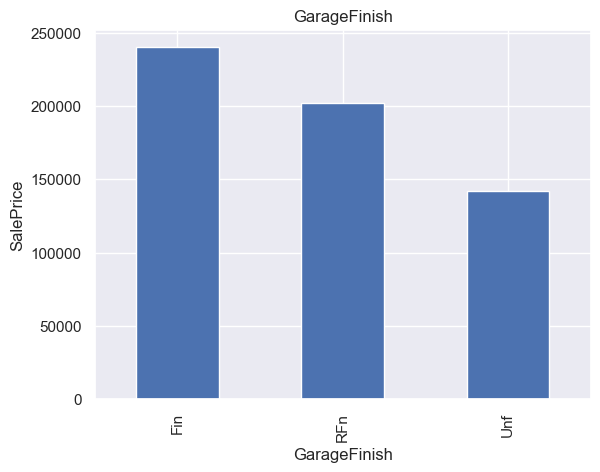

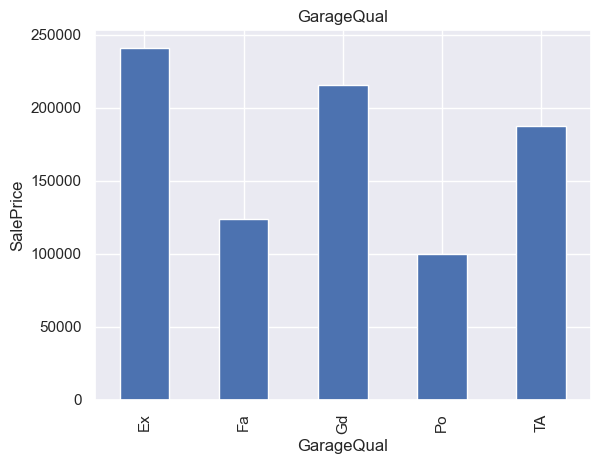

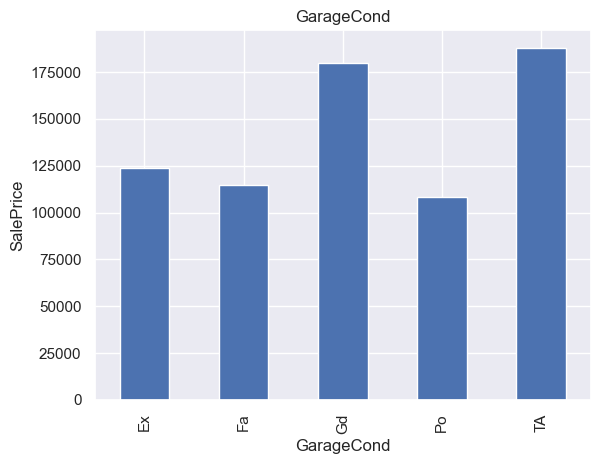

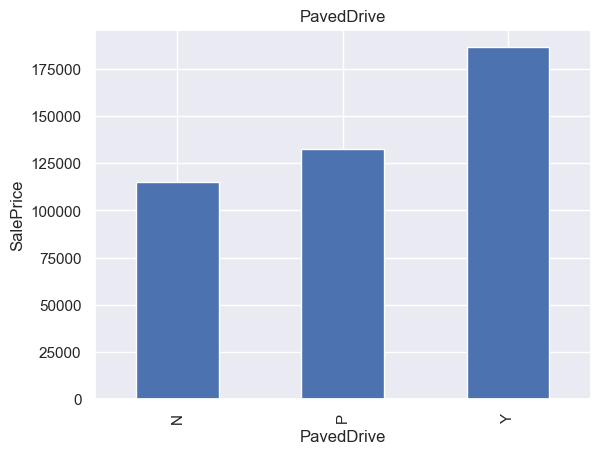

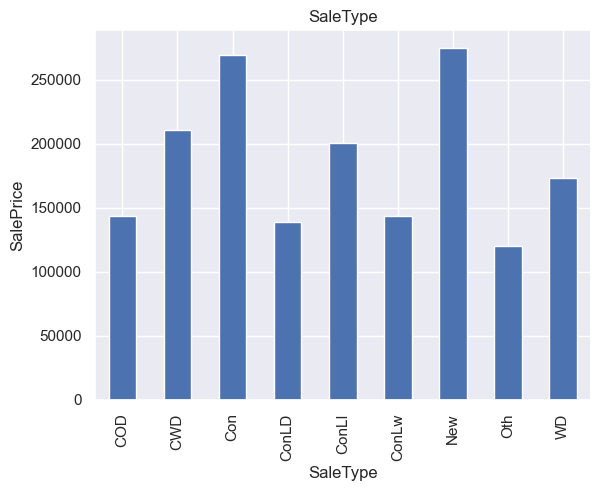

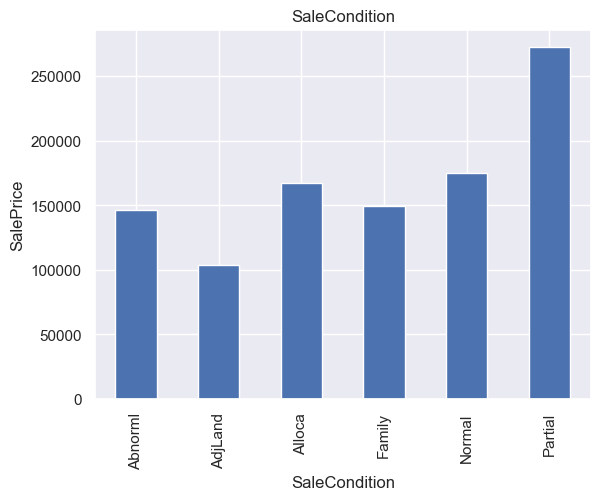

In [20]:
for i in categorical:
    df.groupby(i)['SalePrice'].mean().plot.bar()
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.title(i)
    plt.show()

### After reviewing the categorical variables, we can determine that there are some features that have a significantly higuer sale price:
- Zoning Classification: Floating Village Residential.
- Type of road access to property: Paved
- Type of utilities available: All public Utilities (E,G,W,& S)
- Neighborhood (3): Northridge, Northridge Heights, and Stone Brook
- Type of dwelling (2): Single-family Detached, Townhouse Inside Unit
- Style of dwelling (2):Two and one-half story: 2nd level finished, Two story
- Roof material: Wood Shingles
- Exterior covering on house (2): Imitation Stucco, Stone
- Quality of the material on the exterior: Excelent
- Type of foundation: Poured Contrete	
- Height of the basement: Excellent (100+ inches)
- Rating of basement finished area (if multiple types): Good Living Quarters
- Heating (2): Gas forced warm air furnace, Gas hot water or steam heat
- Heating quality and condition: Excellent
- Central air conditioning: Yes
- Electrical system: Standard Circuit Breakers & Romex
- Kitchen quality: Excellent
- Garage location: Built-In (Garage part of house - typically has room above garage)
- Garage quality (2): Excellent, Good 
- Type of sale (2): New	Home just constructed and sold, Contract 15% Down payment regular terms
- Condition of sale: Home was not completed when last assessed (associated with New Homes)